# Machine Learning Project

**Autor: Agustín Acerbo**

#### Resumen:
<p style="text-align: justify">El presente trabajo tiene como objetivo obtener un modelo que aproxime el puntaje de felicidad de un determinado país en función de las variables ingresadas.</p>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
def calc_null(dta):
    """
    Esta función calcula la cantidad numerica y porcentual de
    datos faltantes de cada columna del dataset de entrada.
    """
    cant_null = []
    porc_null = []
    for feature in dta.columns:
        cant_null.append(sum(dta[feature].isnull()))
        porc_null.append(sum(dta[feature].isnull())*100/dta.shape[0])
    return cant_null, porc_null 

## Análisis exploratorio inicial

Path del dataset

In [3]:
path = './World Happiness Report/'

Las features estan distribuidas en distintas fuentes, donde cada archivo de extensión .csv contiene el ranking de un determinado año, estos archivos son enlistados a continuación:

In [4]:
data_csv = os.listdir(path)
print(data_csv)

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']


Creamos una lista que contiene los distintos datasets

In [5]:
data_original = []
for i, csv in enumerate(data_csv):
    data_original.append(pd.read_csv(path+csv))
    data_original[i].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

En un primer análisis visual, se puede observar que el primer trabajo que debemos hacer es unificar los nombres de las features. Ya que todos los datasets poseen distintas cantidades de features, y aquellas que son comunes tienen nombres distintos.

In [6]:
for dataset in data_original:
    print(dataset.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

A continaución se realiza un breve analisis de los datasets por año.

### 2015

In [7]:
data_original[0].head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
data_original[0].describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
cant_null_2015, porc_null_2015 = calc_null(data_original[0])
orden_2015 =  np.argsort(porc_null_2015)[::-1]

if np.sum(cant_null_2015) != 0:
    print("Datos faltantes")
    for i in range(len(orden_2015)):
        if cant_null_2015[orden_2015[i]] != 0:
            print(f"{data_original[0].columns[orden_2015[i]]}:\tDatos Nan: {cant_null_2015[orden_2015[i]]}\tEn%: {porc_null_2015[orden_2015[i]]}")
else:
    print("No hay datos faltantes")

No hay datos faltantes


### 2016

In [10]:
data_original[1].head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [11]:
data_original[1].describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [12]:
cant_null_2016, porc_null_2016 = calc_null(data_original[1])
orden_2016 =  np.argsort(porc_null_2016)[::-1]

if np.sum(cant_null_2016) != 0:
    print("Datos faltantes")
    for i in range(len(orden_2016)):
        if cant_null_2016[orden_2016[i]] != 0:
            print(f"{data_original[1].columns[orden_2016[i]]}:\tDatos Nan: {cant_null_2016[orden_2016[i]]}\tEn%: {porc_null_2016[orden_2016[i]]}")
else:
    print("No hay datos faltantes")

No hay datos faltantes


### 2017

In [13]:
data_original[2].head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [14]:
data_original[2].describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [15]:
cant_null_2017, porc_null_2017 = calc_null(data_original[2])
orden_2017 =  np.argsort(porc_null_2017)[::-1]

if np.sum(cant_null_2017) != 0:
    print("Datos faltantes")
    for i in range(len(orden_2017)):
        if cant_null_2017[orden_2017[i]] != 0:
            print(f"{data_original[2].columns[orden_2017[i]]}:\tDatos Nan: {cant_null_2017[orden_2017[i]]}\tEn%: {porc_null_2017[orden_2017[i]]}")
else:
    print("No hay datos faltantes")

No hay datos faltantes


### 2018

In [16]:
data_original[3].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [17]:
data_original[3].describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [18]:
cant_null_2018, porc_null_2018 = calc_null(data_original[3])
orden_2018 =  np.argsort(porc_null_2018)[::-1]

if np.sum(cant_null_2018) != 0:
    print("Datos faltantes")
    for i in range(len(orden_2018)):
        if cant_null_2018[orden_2018[i]] != 0:
            print(f"{data_original[3].columns[orden_2018[i]]}:\tDatos Nan: {cant_null_2018[orden_2018[i]]}\tEn%: {porc_null_2018[orden_2018[i]]}")
else:
    print("No hay datos faltantes")

Datos faltantes
Perceptions of corruption:	Datos Nan: 1	En%: 0.6410256410256411


### 2019

In [19]:
data_original[4].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [20]:
data_original[4].describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [21]:
cant_null_2019, porc_null_2019 = calc_null(data_original[4])
orden_2019 =  np.argsort(porc_null_2019)[::-1]

if np.sum(cant_null_2019) != 0:
    print("Datos faltantes")
    for i in range(len(orden_2019)):
        if cant_null_2019[orden_2019[i]] != 0:
            print(f"{data_original[4].columns[orden_2019[i]]}:\tDatos Nan: {cant_null_2019[orden_2019[i]]}\tEn%: {porc_null_2019[orden_2019[i]]}")
else:
    print("No hay datos faltantes")

No hay datos faltantes


En la siguiente tabla se realiza un resumen de las features que aparecen. Como se puede visualizar estas no solo no respetan un orden en comun sino que tambien no poseen el mismo nombre en todos los archivos.

$\begin{array}{|c|c|}
\hline
\hline
Year & Feature 1 & Feature 2 & Feature 3 & Feature 4 & Feature 5 & Feature 6 & Feature 7 & Feature 8 & Feature 9 & Feature 10 & Feature 11 & Feature 12 & Feature 13\\ \hline
2015 & Country & Region & Happiness Rank & Happiness Score & Standard Error & Economy (GDP per Capita) & Family & Health (Life Expectancy) & Freedom & Trust (Government Corruption) & Generosity & Dystopia Residual\\
2016 & Country & Region & Happiness Rank & Happiness Score & Lower Confidence Interval & Upper Confidence Interval & Economy (GDP per Capita) & Family & Health (Life Expectancy) & Freedom & Trust (Government Corruption) & Generosity & Dystopia Residual\\
2017 & Country & Happiness.Rank & Happiness.Score & Whisker.high & Whisker.low & Economy..GDP.per.Capita. & Family & Health..Life.Expectancy. & Freedom & Generosity & Trust..Government.Corruption. & Dystopia.Residual\\ 
2018 & Overall rank & Country or region & Score & GDP per capita & Social support & Healthy life expectancy & Freedom to make life choices & Generosity & Perceptions of corruption\\ 
2019 & Overall rank & Country or region & Score & GDP per capita & Social support & Healthy life expectancy & Freedom to make life choices & Generosity & Perceptions of corruption\\ 
\hline
\end{array}$

En base a la observación de las distintas bases de datos se estandarizan los nombres de las features como se muestra a continuación:

- Country
- Region
- Happiness Rank
- Happiness Score
- Lower Confidence Interval
- Upper Confidence Interval
- Standard Error
- Whisker High
- Whisker Low
- GDP per Capita
- Social support
- Family
- Health life expectancy
- Freedom
- Perceptions of corruption
- Generosity
- Dystopia Residual

In [22]:
features = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval',
            'Standard Error', 'Whisker High', 'Whisker Low', 'GDP per Capita', 'Social Support', 'Family', 'Life Expectancy', 
            'Freedom', 'Perceptions of corruption', 'Generosity', 'Dystopia Residual']

for i, feature in enumerate(features):
    print(f"{i+1} {feature}")

1 Country
2 Region
3 Happiness Rank
4 Happiness Score
5 Lower Confidence Interval
6 Upper Confidence Interval
7 Standard Error
8 Whisker High
9 Whisker Low
10 GDP per Capita
11 Social Support
12 Family
13 Life Expectancy
14 Freedom
15 Perceptions of corruption
16 Generosity
17 Dystopia Residual


## Estandarización de la información

<p style="text-align: justify">A continuación se estandarizan las distintas tablas de los distintos años como se describió anteriormente. En caso que una feature no exista en determiando año se completa sus valores con datos no validos (NaN)</p>

#### 2015
- Se agregan la features:
    - Lower Confidence Interval
    - Upper Confidence Interval
    - Whisker High
    - Whisker Low
    - Social Support

- Se modifican los nombres de las features:
    - Economy (GDP per Capita) a GDP per Capita
    - Health (Life Expectancy) a Life Expectancy
    - Trust (Government Corruption) a Perceptions of corruption

In [23]:
data_2015 = pd.DataFrame()
data_2015['Country'] = data_original[0]['Country']
data_2015['Region'] = data_original[0]['Region']
data_2015['Happiness Rank'] = data_original[0]['Happiness Rank']
data_2015['Happiness Score'] = data_original[0]['Happiness Score']
data_2015['Lower Confidence Interval'] = np.nan
data_2015['Upper Confidence Interval'] = np.nan
data_2015['Standard Error'] = data_original[0]['Standard Error']
data_2015['Whisker High'] = np.nan
data_2015['Whisker Low'] = np.nan
data_2015['GDP per Capita'] = data_original[0]['Economy (GDP per Capita)']
data_2015['Social Support'] = np.nan
data_2015['Family'] = data_original[0]['Family']
data_2015['Life Expectancy'] = data_original[0]['Health (Life Expectancy)']
data_2015['Freedom'] = data_original[0]['Freedom']
data_2015['Perceptions of corruption'] = data_original[0]['Trust (Government Corruption)']
data_2015['Generosity'] = data_original[0]['Generosity']
data_2015['Dystopia Residual'] = data_original[0]['Dystopia Residual']
data_2015.insert(0, "Year", np.ones(len(data_2015))*2015)
data_2015.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,2015.0,Switzerland,Western Europe,1,7.587,NaN,NaN,0.03411,NaN,NaN,1.39651,NaN,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015.0,Iceland,Western Europe,2,7.561,NaN,NaN,0.04884,NaN,NaN,1.30232,NaN,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015.0,Denmark,Western Europe,3,7.527,NaN,NaN,0.03328,NaN,NaN,1.32548,NaN,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015.0,Norway,Western Europe,4,7.522,NaN,NaN,0.03880,NaN,NaN,1.45900,NaN,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015.0,Canada,North America,5,7.427,NaN,NaN,0.03553,NaN,NaN,1.32629,NaN,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### 2016
- Se agregan la features:
    - Standard Error
    - Whisker High
    - Whisker Low
    - Social Support

- Se modifican los nombres de las features:
    - Economy (GDP per Capita) a GDP per Capita
    - Health (Life Expectancy) a Life Expectancy
    - Trust (Government Corruption) a Perceptions of corruption

In [24]:
data_2016 = pd.DataFrame()
data_2016['Country'] = data_original[1]['Country']
data_2016['Region'] = data_original[1]['Region']
data_2016['Happiness Rank'] = data_original[1]['Happiness Rank']
data_2016['Happiness Score'] = data_original[1]['Happiness Score']
data_2016['Lower Confidence Interval'] = data_original[1]['Lower Confidence Interval']
data_2016['Upper Confidence Interval'] = data_original[1]['Upper Confidence Interval']
data_2016['Standard Error'] = np.nan
data_2016['Whisker High'] = np.nan
data_2016['Whisker Low'] = np.nan
data_2016['GDP per Capita'] = data_original[1]['Economy (GDP per Capita)']
data_2016['Social Support'] = np.nan
data_2016['Family'] = data_original[1]['Family']
data_2016['Life Expectancy'] = data_original[1]['Health (Life Expectancy)']
data_2016['Freedom'] = data_original[1]['Freedom']
data_2016['Perceptions of corruption'] = data_original[1]['Trust (Government Corruption)']
data_2016['Generosity'] = data_original[1]['Generosity']
data_2016['Dystopia Residual'] = data_original[1]['Dystopia Residual']
data_2016.insert(0, "Year", np.ones(len(data_2016))*2016)
data_2016.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,2016.0,Denmark,Western Europe,1,7.526,7.460,7.592,NaN,NaN,NaN,1.44178,NaN,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016.0,Switzerland,Western Europe,2,7.509,7.428,7.590,NaN,NaN,NaN,1.52733,NaN,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016.0,Iceland,Western Europe,3,7.501,7.333,7.669,NaN,NaN,NaN,1.42666,NaN,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016.0,Norway,Western Europe,4,7.498,7.421,7.575,NaN,NaN,NaN,1.57744,NaN,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016.0,Finland,Western Europe,5,7.413,7.351,7.475,NaN,NaN,NaN,1.40598,NaN,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### 2017
- Se agregan la features:
    - Region
    - Lower Confidence Interval
    - Upper Confidence Interval
    - Standard Error
    - Social Support

- Se modifican los nombres de las features:
    - Happiness.Rank a Happiness Rank
    - Happiness.Score a Happiness Score
    - Whisker.high a Whisker High
    - Whisker.low a Whisker Low
    - Economy..GDP.per.Capita. a GDP per Capita
    - Health..Life.Expectancy. a Life Expectancy
    - Trust..Government.Corruption. a Perceptions of corruption
    - Dystopia.Residual a Dystopia Residual

In [25]:
data_2017 = pd.DataFrame()
data_2017['Country'] = data_original[2]['Country']
data_2017['Region'] = np.nan
data_2017['Happiness Rank'] = data_original[2]['Happiness.Rank']
data_2017['Happiness Score'] = data_original[2]['Happiness.Score']
data_2017['Lower Confidence Interval'] = np.nan
data_2017['Upper Confidence Interval'] = np.nan
data_2017['Standard Error'] = np.nan
data_2017['Whisker High'] = data_original[2]['Whisker.high']
data_2017['Whisker Low'] = data_original[2]['Whisker.low']
data_2017['GDP per Capita'] = data_original[2]['Economy..GDP.per.Capita.']
data_2017['Social Support'] = np.nan
data_2017['Family'] = data_original[2]['Family']
data_2017['Life Expectancy'] = data_original[2]['Health..Life.Expectancy.']
data_2017['Freedom'] = data_original[2]['Freedom']
data_2017['Perceptions of corruption'] = data_original[2]['Trust..Government.Corruption.']
data_2017['Generosity'] = data_original[2]['Generosity']
data_2017['Dystopia Residual'] = data_original[2]['Dystopia.Residual']
data_2017.insert(0, "Year", np.ones(len(data_2017))*2017)
data_2017.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,2017.0,Norway,NaN,1,7.537,NaN,NaN,NaN,7.594445,7.479556,1.616463,NaN,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,2017.0,Denmark,NaN,2,7.522,NaN,NaN,NaN,7.581728,7.462272,1.482383,NaN,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,2017.0,Iceland,NaN,3,7.504,NaN,NaN,NaN,7.622030,7.385970,1.480633,NaN,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,2017.0,Switzerland,NaN,4,7.494,NaN,NaN,NaN,7.561772,7.426227,1.564980,NaN,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,2017.0,Finland,NaN,5,7.469,NaN,NaN,NaN,7.527542,7.410458,1.443572,NaN,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182


#### 2018
- Se agregan la features:
    - Region
    - Lower Confidence Interval
    - Upper Confidence Interval
    - Standard Error
    - Whisker High
    - Whisker Low
    - Family
    - Dystopia Residual

- Se modifican los nombres de las features:
    - Country or region a Country
    - Overall rank a Happiness Rank
    - Score a Happiness Score
    - Healthy life expectancy a Life Expectancy
    - Freedom to make life choices a Freedom

In [26]:
data_2018 = pd.DataFrame()
data_2018['Country'] = data_original[3]['Country or region']
data_2018['Region'] = np.nan
data_2018['Happiness Rank'] = data_original[3]['Overall rank']
data_2018['Happiness Score'] = data_original[3]['Score']
data_2018['Lower Confidence Interval'] = np.nan
data_2018['Upper Confidence Interval'] = np.nan
data_2018['Standard Error'] = np.nan
data_2018['Whisker High'] = np.nan
data_2018['Whisker Low'] = np.nan
data_2018['GDP per Capita'] = data_original[3]['GDP per capita']
data_2018['Social Support'] = data_original[3]['Social support']
data_2018['Family'] = np.nan
data_2018['Life Expectancy'] = data_original[3]['Healthy life expectancy']
data_2018['Freedom'] = data_original[3]['Freedom to make life choices']
data_2018['Perceptions of corruption'] = data_original[3]['Perceptions of corruption']
data_2018['Generosity'] = data_original[3]['Generosity']
data_2018['Dystopia Residual'] = np.nan
data_2018.insert(0, "Year", np.ones(len(data_2018))*2018)
data_2018.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,2018.0,Finland,NaN,1,7.632,NaN,NaN,NaN,NaN,NaN,1.305,1.592,NaN,0.874,0.681,0.393,0.202,NaN
1,2018.0,Norway,NaN,2,7.594,NaN,NaN,NaN,NaN,NaN,1.456,1.582,NaN,0.861,0.686,0.340,0.286,NaN
2,2018.0,Denmark,NaN,3,7.555,NaN,NaN,NaN,NaN,NaN,1.351,1.590,NaN,0.868,0.683,0.408,0.284,NaN
3,2018.0,Iceland,NaN,4,7.495,NaN,NaN,NaN,NaN,NaN,1.343,1.644,NaN,0.914,0.677,0.138,0.353,NaN
4,2018.0,Switzerland,NaN,5,7.487,NaN,NaN,NaN,NaN,NaN,1.420,1.549,NaN,0.927,0.660,0.357,0.256,NaN


#### 2019
- Se agregan la features:
    - Region
    - Lower Confidence Interval
    - Upper Confidence Interval
    - Standard Error
    - Whisker High
    - Whisker Low
    - Family
    - Dystopia Residual

- Se modifican los nombres de las features:
    - Country or region a Country
    - Overall rank a Happiness Rank
    - Score a Happiness Score
    - Healthy life expectancy a Life Expectancy
    - Freedom to make life choices a Freedom

In [27]:
data_2019 = pd.DataFrame()
data_2019['Country'] = data_original[4]['Country or region']
data_2019['Region'] = np.nan
data_2019['Happiness Rank'] = data_original[4]['Overall rank']
data_2019['Happiness Score'] = data_original[4]['Score']
data_2019['Lower Confidence Interval'] = np.nan
data_2019['Upper Confidence Interval'] = np.nan
data_2019['Standard Error'] = np.nan
data_2019['Whisker High'] = np.nan
data_2019['Whisker Low'] = np.nan
data_2019['GDP per Capita'] = data_original[4]['GDP per capita']
data_2019['Social Support'] = data_original[4]['Social support']
data_2019['Family'] = np.nan
data_2019['Life Expectancy'] = data_original[4]['Healthy life expectancy']
data_2019['Freedom'] = data_original[4]['Freedom to make life choices']
data_2019['Generosity'] = data_original[4]['Generosity']
data_2019['Perceptions of corruption'] = data_original[4]['Perceptions of corruption']
data_2019['Dystopia Residual'] = np.nan
data_2019.insert(0, "Year", np.ones(len(data_2019))*2019)
data_2019.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,2019.0,Finland,NaN,1,7.769,NaN,NaN,NaN,NaN,NaN,1.340,1.587,NaN,0.986,0.596,0.153,0.393,NaN
1,2019.0,Denmark,NaN,2,7.600,NaN,NaN,NaN,NaN,NaN,1.383,1.573,NaN,0.996,0.592,0.252,0.410,NaN
2,2019.0,Norway,NaN,3,7.554,NaN,NaN,NaN,NaN,NaN,1.488,1.582,NaN,1.028,0.603,0.271,0.341,NaN
3,2019.0,Iceland,NaN,4,7.494,NaN,NaN,NaN,NaN,NaN,1.380,1.624,NaN,1.026,0.591,0.354,0.118,NaN
4,2019.0,Netherlands,NaN,5,7.488,NaN,NaN,NaN,NaN,NaN,1.396,1.522,NaN,0.999,0.557,0.322,0.298,NaN


Se guardan estos cambios:

In [28]:
path_data = './Full_Datasets/'

In [29]:
data_2015.to_csv(path_data+'full_2015.csv', index=False)
data_2016.to_csv(path_data+'full_2016.csv', index=False)
data_2017.to_csv(path_data+'full_2017.csv', index=False)
data_2018.to_csv(path_data+'full_2018.csv', index=False)
data_2019.to_csv(path_data+'full_2019.csv', index=False)

### Full Data
Se genera una tabla con los datos de todos los años y se la guarda en un archivo de extension .csv con el nombre full_data


In [30]:
full_dataset = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019], ignore_index=True)
full_dataset.to_csv(path_data+'full_data.csv', index=False)
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       782 non-null    float64
 1   Country                    782 non-null    object 
 2   Region                     315 non-null    object 
 3   Happiness Rank             782 non-null    int64  
 4   Happiness Score            782 non-null    float64
 5   Lower Confidence Interval  157 non-null    float64
 6   Upper Confidence Interval  157 non-null    float64
 7   Standard Error             158 non-null    float64
 8   Whisker High               155 non-null    float64
 9   Whisker Low                155 non-null    float64
 10  GDP per Capita             782 non-null    float64
 11  Social Support             312 non-null    float64
 12  Family                     470 non-null    float64
 13  Life Expectancy            782 non-null    float64

In [31]:
full_dataset.describe()

,Year,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
count,782.000000,782.000000,782.000000,157.000000,157.000000,158.000000,155.000000,155.000000,782.000000,312.000000,470.000000,782.000000,782.000000,781.000000,782.000000,470.000000
mean,2016.993606,78.698210,5.379018,5.282395,5.481975,0.047885,5.452326,5.255713,0.916047,1.211026,0.990347,0.612416,0.411091,0.125436,0.218576,2.092717
std,1.417364,45.182384,1.127456,1.148043,1.136493,0.017146,1.118542,1.145030,0.407340,0.300310,0.318707,0.248309,0.152880,0.105816,0.122321,0.565772
min,2015.000000,1.000000,2.693000,2.732000,3.078000,0.018480,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2016.000000,40.000000,4.509750,4.327000,4.465000,0.037268,4.608172,4.374955,0.606500,1.055750,0.793000,0.440183,0.309767,0.054000,0.130000,1.737975
50%,2017.000000,79.000000,5.322000,5.237000,5.419000,0.043940,5.370032,5.193152,0.982205,1.265500,1.025665,0.647310,0.431000,0.091000,0.201982,2.094640
75%,2018.000000,118.000000,6.189500,6.154000,6.434000,0.052300,6.194600,6.006527,1.236187,1.457500,1.228745,0.808000,0.531000,0.156030,0.278832,2.455575
max,2019.000000,158.000000,7.769000,7.460000,7.669000,0.136930,7.622030,7.479556,2.096000,1.644000,1.610574,1.141000,0.724000,0.551910,0.838075,3.837720


In [32]:
full_dataset.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,2015.0,Switzerland,Western Europe,1,7.587,NaN,NaN,0.03411,NaN,NaN,1.39651,NaN,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015.0,Iceland,Western Europe,2,7.561,NaN,NaN,0.04884,NaN,NaN,1.30232,NaN,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015.0,Denmark,Western Europe,3,7.527,NaN,NaN,0.03328,NaN,NaN,1.32548,NaN,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015.0,Norway,Western Europe,4,7.522,NaN,NaN,0.03880,NaN,NaN,1.45900,NaN,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015.0,Canada,North America,5,7.427,NaN,NaN,0.03553,NaN,NaN,1.32629,NaN,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Ingenieria de features

In [33]:
def show_boxplot(df, variable):
    fig,axes = plt.subplots(1,len(variable),figsize=(22,8),sharex='row',sharey='row')
    for i, var in enumerate(variable):
        sns.boxplot(y=df[var],ax=axes[i])
        
def show_histogram(dt, var):
    fig = dt.hist(xlabelsize=12, ylabelsize=12,figsize=(22,8), bins=30)
    plt.suptitle(var, fontsize=20)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

Se clasifican las features en categóricas, numéricas y de salida:

In [34]:
categoricas = ['Country', 'Region', 'Happiness Rank']
numericas = ['Lower Confidence Interval', 'Upper Confidence Interval', 'Standard Error', 'Whisker High',
             'Whisker Low', 'GDP per Capita', 'Social Support', 'Family', 'Life Expectancy','Freedom',
             'Perceptions of corruption', 'Generosity', 'Dystopia Residual']
output = ['Happiness Score']

Se crea el Data Frame 'ds_final' donde se realizaran las modificaciones necesarias y finalmente contendra las features que utilizaremos para el entrenamiento de nuestros modelos.

In [35]:
ds_final = full_dataset.copy()

In [36]:
ds_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       782 non-null    float64
 1   Country                    782 non-null    object 
 2   Region                     315 non-null    object 
 3   Happiness Rank             782 non-null    int64  
 4   Happiness Score            782 non-null    float64
 5   Lower Confidence Interval  157 non-null    float64
 6   Upper Confidence Interval  157 non-null    float64
 7   Standard Error             158 non-null    float64
 8   Whisker High               155 non-null    float64
 9   Whisker Low                155 non-null    float64
 10  GDP per Capita             782 non-null    float64
 11  Social Support             312 non-null    float64
 12  Family                     470 non-null    float64
 13  Life Expectancy            782 non-null    float64

### Variable de salida

El histograma y el box-plot de la variable de salida nos revela que la mayor cantidad de valores se encuentran entre 4 y 6.5.

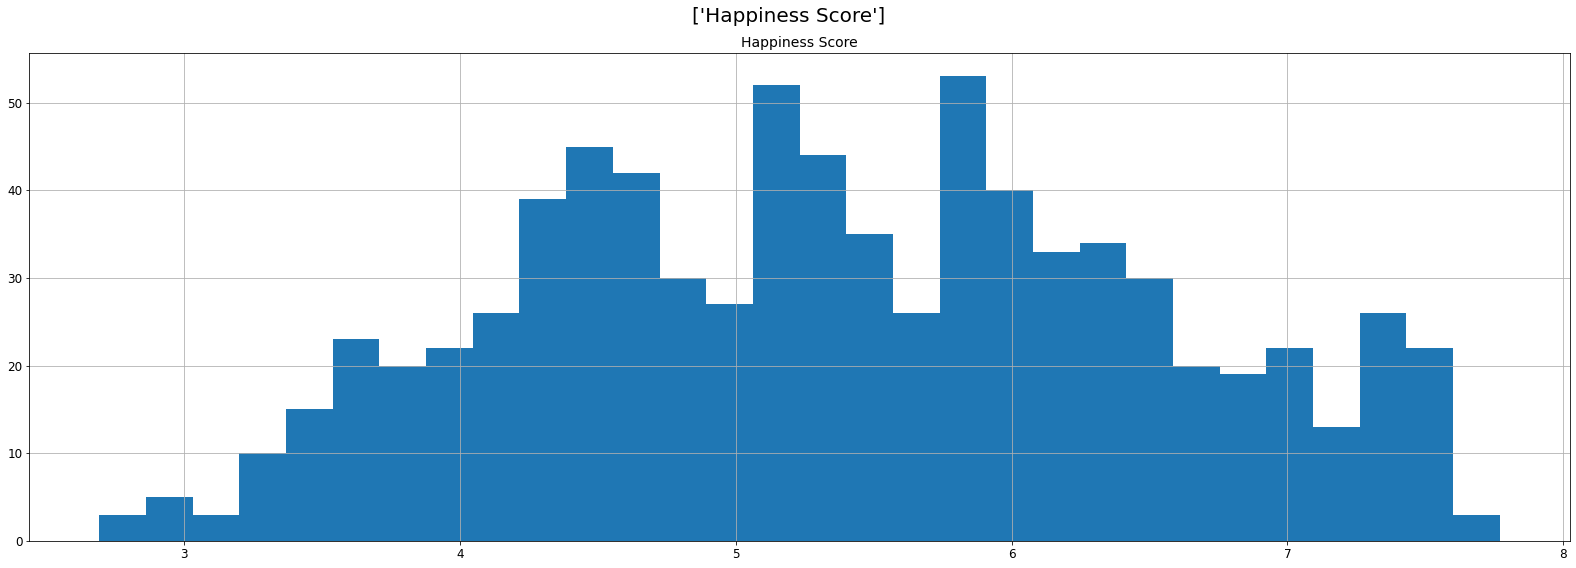

In [37]:
show_histogram(full_dataset[output], output)

<AxesSubplot:ylabel='Happiness Score'>

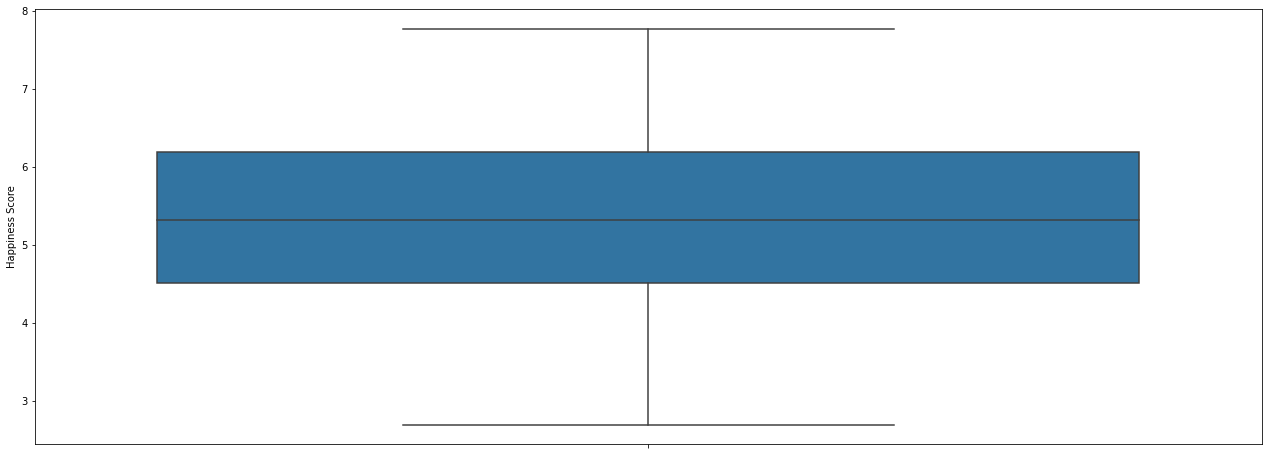

In [38]:
fig,axes = plt.subplots(1,1,figsize=(22,8),sharex='row',sharey='row')
sns.boxplot(y=full_dataset['Happiness Score'])

### Features categóricas

Como variables categoricas tenemos tres, 'Country', 'Region' y ' Happiness Rank'.

#### Happiness Rank

Esta variable es el ranking en que un país estuvo determinado año y es redundante con nuestra salida. Por lo tanto se opta por borrarla.

In [39]:
ds_final.drop(['Happiness Rank'], axis=1, inplace=True)

In [40]:
categoricas_clean = ['Country', 'Region']

In [41]:
ds_final.head()

,Year,Country,Region,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,2015.0,Switzerland,Western Europe,7.587,NaN,NaN,0.03411,NaN,NaN,1.39651,NaN,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015.0,Iceland,Western Europe,7.561,NaN,NaN,0.04884,NaN,NaN,1.30232,NaN,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015.0,Denmark,Western Europe,7.527,NaN,NaN,0.03328,NaN,NaN,1.32548,NaN,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015.0,Norway,Western Europe,7.522,NaN,NaN,0.03880,NaN,NaN,1.45900,NaN,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015.0,Canada,North America,7.427,NaN,NaN,0.03553,NaN,NaN,1.32629,NaN,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Country

Analizaremos los paises que aparecen para verificar que los nombres esten estandarizados.

In [42]:
for i, count in enumerate(ds_final.sort_values(by=['Country'])['Country']):
    print(count)

Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Albania
Albania
Albania
Albania
Albania
Algeria
Algeria
Algeria
Algeria
Algeria
Angola
Angola
Angola
Angola
Argentina
Argentina
Argentina
Argentina
Argentina
Armenia
Armenia
Armenia
Armenia
Armenia
Australia
Australia
Australia
Australia
Australia
Austria
Austria
Austria
Austria
Austria
Azerbaijan
Azerbaijan
Azerbaijan
Azerbaijan
Azerbaijan
Bahrain
Bahrain
Bahrain
Bahrain
Bahrain
Bangladesh
Bangladesh
Bangladesh
Bangladesh
Bangladesh
Belarus
Belarus
Belarus
Belarus
Belarus
Belgium
Belgium
Belgium
Belgium
Belgium
Belize
Belize
Belize
Benin
Benin
Benin
Benin
Benin
Bhutan
Bhutan
Bhutan
Bhutan
Bhutan
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bosnia and Herzegovina
Bosnia and Herzegovina
Bosnia and Herzegovina
Bosnia and Herzegovina
Bosnia and Herzegovina
Botswana
Botswana
Botswana
Botswana
Botswana
Brazil
Brazil
Brazil
Brazil
Brazil
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Burkina Faso
Burkina Faso
Burkina Faso
Burkina Faso
Burk

In [43]:
for i, count in enumerate(ds_final.sort_values(by=['Country'])['Country'].unique()):
    print(count)

Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Haiti
Honduras
Hong Kong
Hong Kong S.A.R., China
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
North Cyprus
North Macedonia

A traves de la inspección visual se detectaron que deben corregirse algunos paises para estandarizar su nombre. Estos son:

- **'Macedonia'** y **'North Macedonia'**	
- **'North Cyprus'** y **'Northern Cyprus'**
- **'Taiwan'** y **'Taiwan Province of China'**	
- **'Trinidad & Tobago'** y **'Trinidad and Tobago'**
- **'Hong Kong S.A.R., China'** y **'Hong Kong'**

In [44]:
ds_final.replace({'Country': {'North Macedonia': 'Macedonia',
                              'Northern Cyprus': 'North Cyprus',
                              'Taiwan Province of China': 'Taiwan',
                              'Trinidad & Tobago': 'Trinidad and Tobago',
                              'Hong Kong S.A.R., China': 'Hong Kong'
                              }},
                inplace = True)
for i, count in enumerate(ds_final.sort_values(by=['Country'])['Country'].unique()):
    print(count)

Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
North Cyprus
Norway
Oman
Pakistan
Palestinian Territ

### Region

Las regiones en las que se clasifican los distintos paises son:

In [45]:
for i, count in enumerate(ds_final.sort_values(by=['Region'])['Region'].unique()):
    print(count)

Australia and New Zealand
Central and Eastern Europe
Eastern Asia
Latin America and Caribbean
Middle East and Northern Africa
North America
Southeastern Asia
Southern Asia
Sub-Saharan Africa
Western Europe
nan


In [46]:
cant_null, porc_null = calc_null(full_dataset[categoricas_clean])
orden =  np.argsort(porc_null)[::-1]

if np.sum(cant_null) != 0:
    print("Datos faltantes")
    for i in range(len(orden)):
        if cant_null[orden[i]] != 0:
            print(f"{full_dataset[categoricas_clean].columns[orden[i]]}:\n"
                  f"\tDatos Nan: {cant_null[orden[i]]}\n"
                  f"\tEn%: {porc_null[orden[i]]}")
else:
    print("No hay datos faltantes")

Datos faltantes
Region:
	Datos Nan: 467
	En%: 59.71867007672634


Como se puede observar hay muestras en la que la región no se encuentra definida, debido a que solo los datasets del 2015 y del 2016 poseen esta feature. Para completar estos datos crearemos un diccionario cuya key sea el pais y su value sea la region.

In [47]:
def dict_country_region(dictionary, ks, vls):
    for i, k in enumerate(ks):
        if k not in dictionary.keys():
            dictionary[k] = vls[i]
    return dictionary

In [48]:
country_region = {}
country_region = dict_country_region(country_region, data_original[0]['Country'], data_original[0]['Region'])
country_region = dict_country_region(country_region, data_original[1]['Country'], data_original[1]['Region'])

In [49]:
for i, country in enumerate(ds_final.sort_values(by=['Country'])['Country'].unique()):
    try:
        country_region[country]
    except KeyError:
        print(f"{country} no posee region definida")

Gambia no posee region definida


Como podemos ver no tenemos definida la región de Gambia siendo esta Sub-Saharan Africa, por lo que se la agrega al diccionario.

In [50]:
country_region = dict_country_region(country_region, ['Gambia'], ['Sub-Saharan Africa'])

A continuación se crea un array con las regiones para cada pais en el dataset.

In [51]:
region = []
for i, country in enumerate(ds_final['Country']):
    region.append(country_region[country])

Con el array antes creado se crea un dataframe para luego concatenarlo a nuestro dataset final.

In [52]:
reg = pd.DataFrame({'Region': region})
reg.head()

,Region
0,Western Europe
1,Western Europe
2,Western Europe
3,Western Europe
4,North America


In [53]:
ds_final.drop(['Region'], axis=1, inplace=True)

In [54]:
ds_final = pd.concat([ds_final, reg], axis=1)

In [55]:
ds_final.head()

,Year,Country,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Region
0,2015.0,Switzerland,7.587,NaN,NaN,0.03411,NaN,NaN,1.39651,NaN,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Western Europe
1,2015.0,Iceland,7.561,NaN,NaN,0.04884,NaN,NaN,1.30232,NaN,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Western Europe
2,2015.0,Denmark,7.527,NaN,NaN,0.03328,NaN,NaN,1.32548,NaN,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Western Europe
3,2015.0,Norway,7.522,NaN,NaN,0.03880,NaN,NaN,1.45900,NaN,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Western Europe
4,2015.0,Canada,7.427,NaN,NaN,0.03553,NaN,NaN,1.32629,NaN,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,North America


In [56]:
ds_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       782 non-null    float64
 1   Country                    782 non-null    object 
 2   Happiness Score            782 non-null    float64
 3   Lower Confidence Interval  157 non-null    float64
 4   Upper Confidence Interval  157 non-null    float64
 5   Standard Error             158 non-null    float64
 6   Whisker High               155 non-null    float64
 7   Whisker Low                155 non-null    float64
 8   GDP per Capita             782 non-null    float64
 9   Social Support             312 non-null    float64
 10  Family                     470 non-null    float64
 11  Life Expectancy            782 non-null    float64
 12  Freedom                    782 non-null    float64
 13  Perceptions of corruption  781 non-null    float64

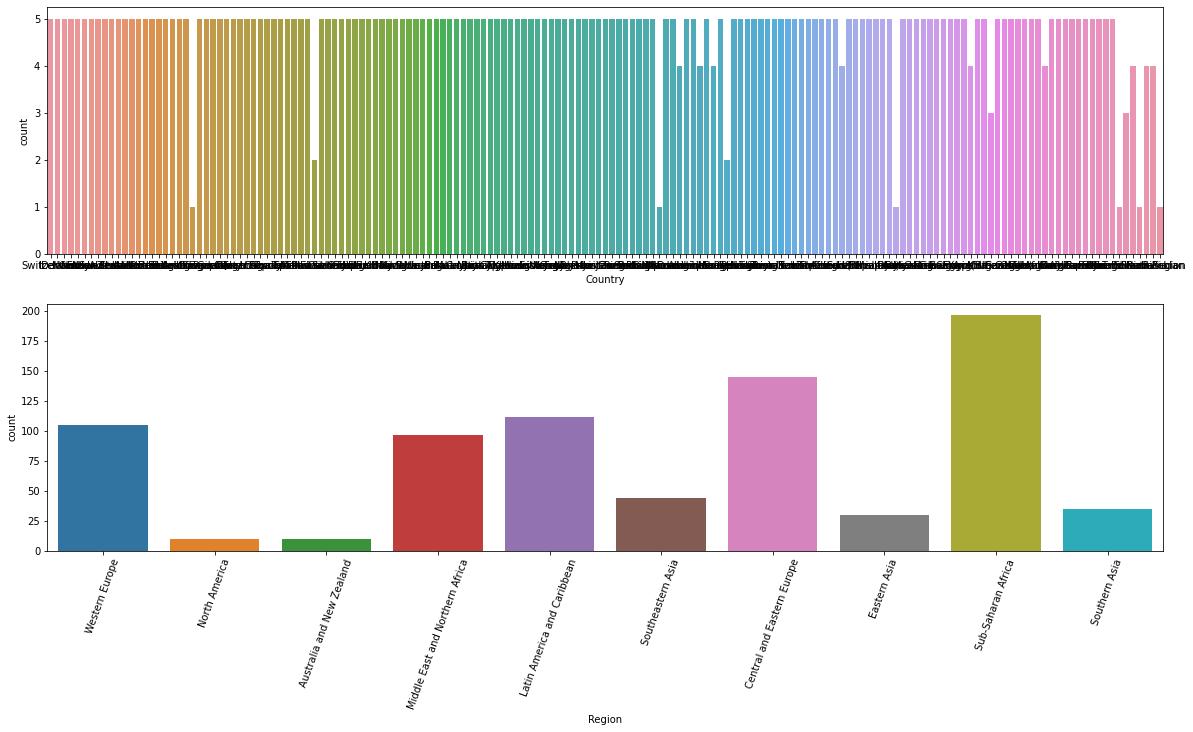

In [57]:
fig,axes = plt.subplots(len(categoricas_clean),1,figsize=(20,10))
for i,feature in enumerate(categoricas_clean):
    sns.countplot(x=feature, data=ds_final,ax=axes[i])
    plt.xticks(rotation=70)

Finalmete, se verifica la existencia de datos no validos en las variables categoricas.

In [58]:
cant_null, porc_null = calc_null(ds_final[categoricas_clean])
orden =  np.argsort(porc_null)[::-1]

if np.sum(cant_null) != 0:
    print("Datos faltantes")
    for i in range(len(orden)):
        if cant_null[orden[i]] != 0:
            print(f"{ds_final[categoricas_clean].columns[orden[i]]}:\n"
                  f"\tDatos Nan: {cant_null[orden[i]]}\n"
                  f"\tEn%: {porc_null[orden[i]]}")
else:
    print("No hay datos faltantes")

No hay datos faltantes


### Features numéricas

In [59]:
cant_null, porc_null = calc_null(ds_final)
orden =  np.argsort(porc_null)[::-1]

if np.sum(cant_null) != 0:
    print("Datos faltantes")
    for i in range(len(orden)):
        if cant_null[orden[i]] != 0:
            print(f"{ds_final.columns[orden[i]]}:\n"
                  f"\tDatos Nan: {cant_null[orden[i]]}\n"
                  f"\tEn%: {porc_null[orden[i]]}")
else:
    print("No hay datos faltantes")

Datos faltantes
Whisker Low:
	Datos Nan: 627
	En%: 80.17902813299233
Whisker High:
	Datos Nan: 627
	En%: 80.17902813299233
Upper Confidence Interval:
	Datos Nan: 625
	En%: 79.923273657289
Lower Confidence Interval:
	Datos Nan: 625
	En%: 79.923273657289
Standard Error:
	Datos Nan: 624
	En%: 79.79539641943734
Social Support:
	Datos Nan: 470
	En%: 60.10230179028133
Family:
	Datos Nan: 312
	En%: 39.89769820971867
Dystopia Residual:
	Datos Nan: 312
	En%: 39.89769820971867
Perceptions of corruption:
	Datos Nan: 1
	En%: 0.1278772378516624


#### Perceptions of corruption
Esta feature posee un dato faltante, que corresponde al país 'United Arab Emirates' en el año 2018:

In [60]:
ds_final[ds_final['Perceptions of corruption'].isna()]

,Year,Country,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Region
489,2018.0,United Arab Emirates,6.774,NaN,NaN,NaN,NaN,NaN,2.096,0.776,NaN,0.67,0.284,NaN,0.186,NaN,Middle East and Northern Africa


In [61]:
ds_final[ds_final['Country'] == 'United Arab Emirates']

,Year,Country,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Region
19,2015.0,United Arab Emirates,6.901,NaN,NaN,0.03729,NaN,NaN,1.427270,NaN,1.12575,0.809250,0.641570,0.38583,0.264280,2.247430,Middle East and Northern Africa
185,2016.0,United Arab Emirates,6.573,6.494,6.652,NaN,NaN,NaN,1.573520,NaN,0.87114,0.729930,0.562150,0.35561,0.265910,2.215070,Middle East and Northern Africa
335,2017.0,United Arab Emirates,6.648,NaN,NaN,NaN,6.722047,6.573952,1.626343,NaN,1.26641,0.726798,0.608345,0.32449,0.360942,1.734704,Middle East and Northern Africa
489,2018.0,United Arab Emirates,6.774,NaN,NaN,NaN,NaN,NaN,2.096000,0.776,NaN,0.670000,0.284000,NaN,0.186000,NaN,Middle East and Northern Africa
646,2019.0,United Arab Emirates,6.825,NaN,NaN,NaN,NaN,NaN,1.503000,1.310,NaN,0.825000,0.598000,0.18200,0.262000,NaN,Middle East and Northern Africa


Se completa este dato con la media de la percepcion de corrupción de todas las medidas de dicho pais:

In [62]:
ds_final['Perceptions of corruption'] = ds_final['Perceptions of corruption'].fillna(ds_final[ds_final['Country'] == 'United Arab Emirates']['Perceptions of corruption'].mean())

In [63]:
ds_final[ds_final['Country'] == 'United Arab Emirates']

,Year,Country,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Whisker High,Whisker Low,GDP per Capita,Social Support,Family,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Region
19,2015.0,United Arab Emirates,6.901,NaN,NaN,0.03729,NaN,NaN,1.427270,NaN,1.12575,0.809250,0.641570,0.385830,0.264280,2.247430,Middle East and Northern Africa
185,2016.0,United Arab Emirates,6.573,6.494,6.652,NaN,NaN,NaN,1.573520,NaN,0.87114,0.729930,0.562150,0.355610,0.265910,2.215070,Middle East and Northern Africa
335,2017.0,United Arab Emirates,6.648,NaN,NaN,NaN,6.722047,6.573952,1.626343,NaN,1.26641,0.726798,0.608345,0.324490,0.360942,1.734704,Middle East and Northern Africa
489,2018.0,United Arab Emirates,6.774,NaN,NaN,NaN,NaN,NaN,2.096000,0.776,NaN,0.670000,0.284000,0.311982,0.186000,NaN,Middle East and Northern Africa
646,2019.0,United Arab Emirates,6.825,NaN,NaN,NaN,NaN,NaN,1.503000,1.310,NaN,0.825000,0.598000,0.182000,0.262000,NaN,Middle East and Northern Africa


#### Otros datos faltantes

Como ya se ha mostrado otras variables que poseen datos faltantes son:

- Whisker Low: 80.18%
- Whisker High: 80.18%
- Upper Confidence Interval: 79.92%
- Lower Confidence Interval: 79.92%
- Standard Error: 79.8%
- Social Support: 60.10%
- Family: 39.9%
- Dystopia Residual: 39.9%

Dada la gran cantidad de datos faltantes se opta por eliminar estas variables.

In [64]:
ds_final.drop(['Lower Confidence Interval', 'Upper Confidence Interval',
               'Standard Error', 'Whisker High','Whisker Low', 'Social Support',
               'Family', 'Dystopia Residual'], axis=1, inplace=True)

## Final Dataset

In [65]:
ds_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       782 non-null    float64
 1   Country                    782 non-null    object 
 2   Happiness Score            782 non-null    float64
 3   GDP per Capita             782 non-null    float64
 4   Life Expectancy            782 non-null    float64
 5   Freedom                    782 non-null    float64
 6   Perceptions of corruption  782 non-null    float64
 7   Generosity                 782 non-null    float64
 8   Region                     782 non-null    object 
dtypes: float64(7), object(2)
memory usage: 55.1+ KB


In [66]:
ds_final.head()

,Year,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Region
0,2015.0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,Western Europe
1,2015.0,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,Western Europe
2,2015.0,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,Western Europe
3,2015.0,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,Western Europe
4,2015.0,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,North America


In [67]:
cant_null, porc_null = calc_null(ds_final)
orden =  np.argsort(porc_null)[::-1]

if np.sum(cant_null) != 0:
    print("Datos faltantes")
    for i in range(len(orden)):
        if cant_null[orden[i]] != 0:
            print(f"{ds_final.columns[orden[i]]}:\n"
                  f"\tDatos Nan: {cant_null[orden[i]]}\n"
                  f"\tEn%: {porc_null[orden[i]]}")
else:
    print("No hay datos faltantes")

No hay datos faltantes


#### Variables resultantes

In [68]:
categoricas_final = ['Country', 'Region']
numericas_final = ['GDP per Capita', 'Life Expectancy','Freedom', 'Perceptions of corruption', 'Generosity']

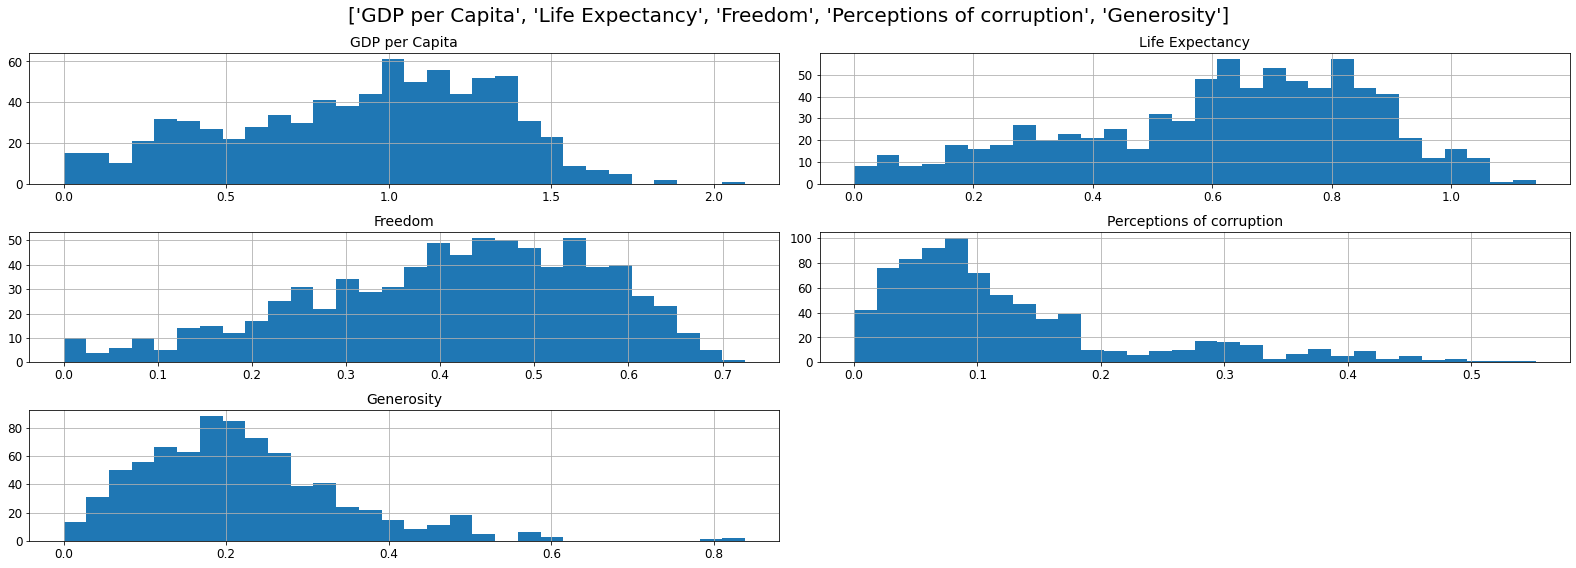

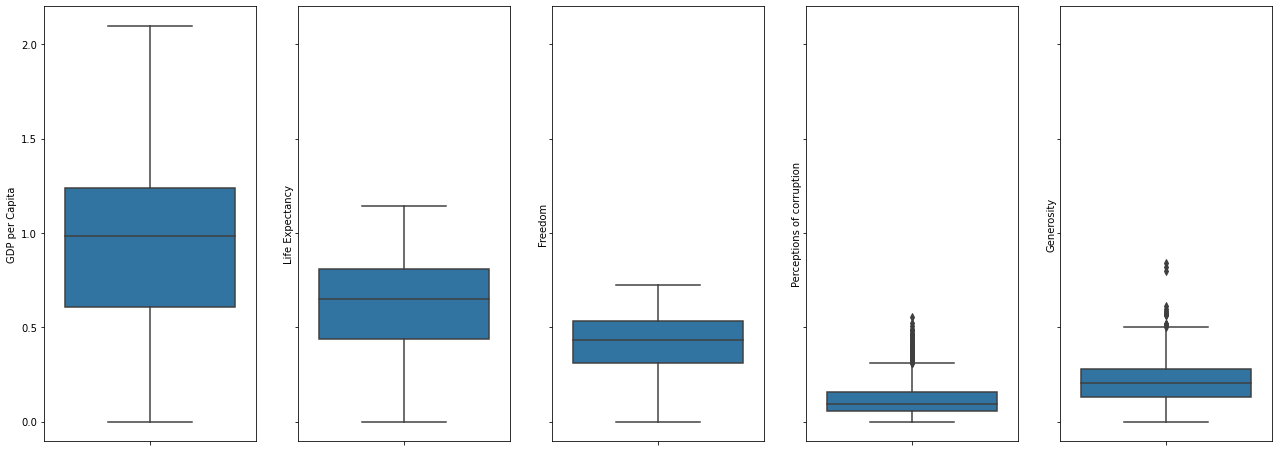

In [69]:
show_histogram(ds_final[numericas_final], numericas_final)
show_boxplot(ds_final, numericas_final)

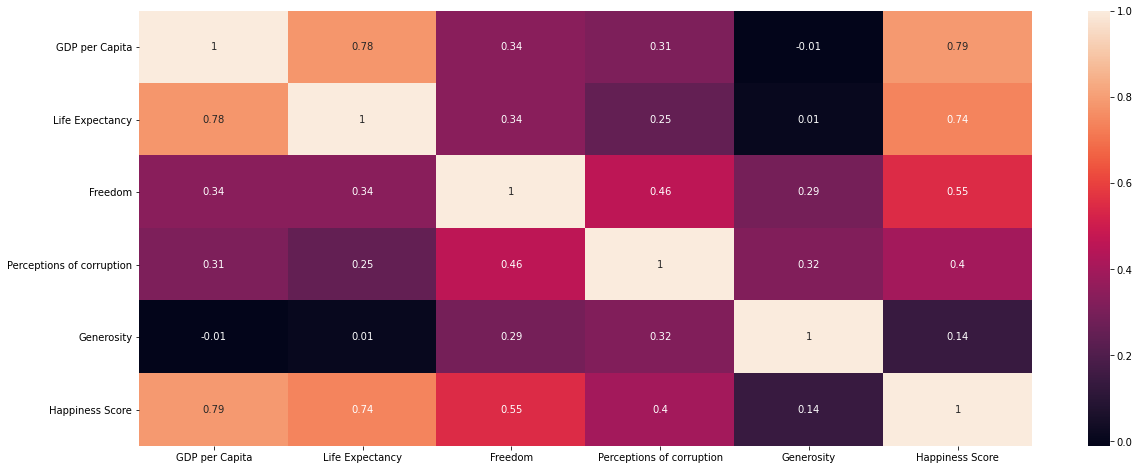

In [70]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = ds_final[['GDP per Capita', 'Life Expectancy',
                               'Freedom', 'Perceptions of corruption', 
                               'Generosity','Happiness Score']].corr(method='pearson').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

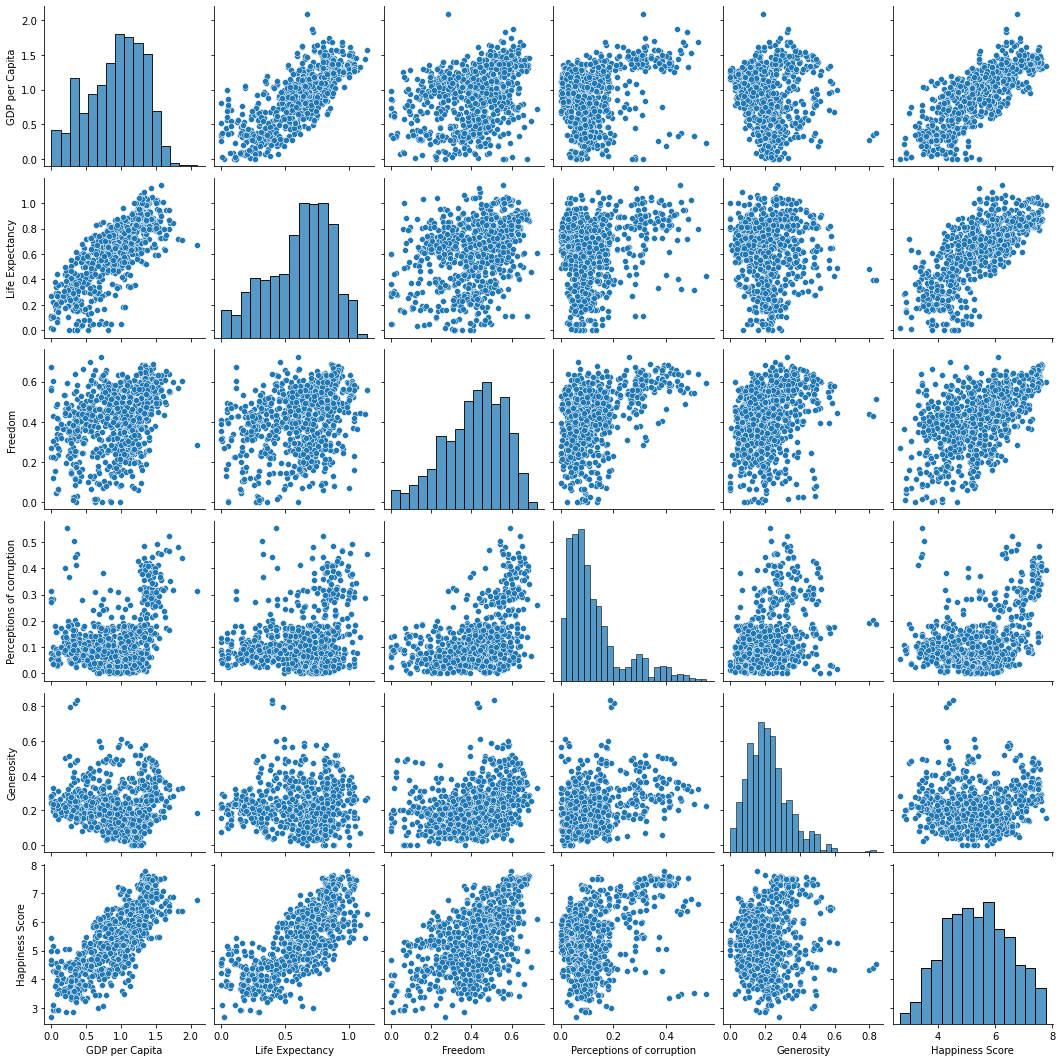

In [71]:
sns.pairplot(ds_final[['GDP per Capita', 'Life Expectancy','Freedom','Perceptions of corruption', 'Generosity','Happiness Score']])

In [72]:
ds_final.to_csv(path_data+'ds_final.csv', index=False)